In [2]:
from neuralprophet import NeuralProphet

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [18]:
df=pd.read_csv('weather_Bhubhneshwar_formatted.csv')

In [19]:
df.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,01-01-1990,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-1990,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-1990,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-1990,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-1990,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

In [21]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [22]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
snow           float64
wdir           float64
wspd           float64
wpgt           float64
pres           float64
tsun           float64
dtype: object

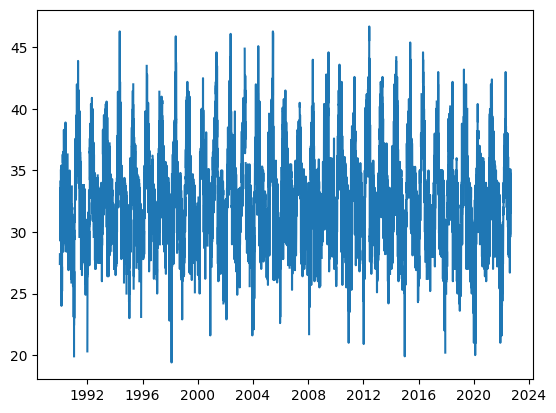

In [23]:
plt.plot(df['time'],df['tmax'])

In [24]:
data=df[['time','tmax']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_3088\2974680685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,1990-01-01,28.0
2,1990-01-03,27.4
3,1990-01-04,28.0
4,1990-01-05,28.2
7,1990-01-08,29.5


In [14]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [15]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 93.562% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (173) is too small than the required number                     for the learning rate finder (251). The results might not be optimal.


Finding best initial lr:   0%|          | 0/251 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,23.572699,29.122753,0.585909,0.0,0
1,20.850603,25.778120,0.489820,0.0,1
2,18.295721,22.634579,0.401589,0.0,2
3,15.951674,19.719311,0.322066,0.0,3
4,13.770241,16.976912,0.250784,0.0,4
...,...,...,...,...,...
995,1.733316,2.287202,0.005052,0.0,995
996,1.731188,2.285599,0.005039,0.0,996
997,1.732117,2.285508,0.005041,0.0,997
998,1.730911,2.286280,0.005041,0.0,998


In [25]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 93.562% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 173it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-09-05,None,31.274416,32.040428,-0.799012,0.032998
1,2022-09-06,None,31.310844,32.039989,-0.784824,0.055676
2,2022-09-07,None,31.256775,32.039551,-0.769815,-0.012962
3,2022-09-08,None,31.221210,32.039112,-0.754076,-0.063827
4,2022-09-09,None,31.248814,32.038673,-0.737765,-0.052094


In [26]:
plot1=model.plot(forecast)


In [27]:
plot1


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '5d64a02f-5590-457a-bf48-7f6ec817a750',
              'x': array([datetime.datetime(2022, 9, 5, 0, 0),
                          datetime.datetime(2022, 9, 6, 0, 0),
                          datetime.datetime(2022, 9, 7, 0, 0), ...,
                          datetime.datetime(2025, 2, 18, 0, 0),
                          datetime.datetime(2025, 2, 19, 0, 0),
                          datetime.datetime(2025, 2, 20, 0, 0)], dtype=object),
              'y': array([31.274416, 31.310844, 31.256775, ..., 31.728943, 31.792992, 31.873287],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '1

In [28]:
with open('Bhubneshwar_max_model.pkl','wb') as f:
    pickle.dump(model,f)